# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [17]:
!pip install requests

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import requests

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [27]:
#Import data
import dataproject as datp

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [28]:
df = datp.df

HourUTC               HourDK PriceArea  CentralPowerMWh  \
0      2022-12-31T22:00:00  2022-12-31T23:00:00       DK1       223.523422   
1      2022-12-31T22:00:00  2022-12-31T23:00:00       DK2       130.404709   
2      2022-12-31T21:00:00  2022-12-31T22:00:00       DK1       282.433380   
3      2022-12-31T21:00:00  2022-12-31T22:00:00       DK2       138.267258   
4      2022-12-31T20:00:00  2022-12-31T21:00:00       DK1       391.207977   
...                    ...                  ...       ...              ...   
17515  2022-01-01T01:00:00  2022-01-01T02:00:00       DK2       260.299713   
17516  2022-01-01T00:00:00  2022-01-01T01:00:00       DK1       279.512573   
17517  2022-01-01T00:00:00  2022-01-01T01:00:00       DK2       305.081635   
17518  2021-12-31T23:00:00  2022-01-01T00:00:00       DK1       332.849854   
17519  2021-12-31T23:00:00  2022-01-01T00:00:00       DK2       448.618500   

       LocalPowerMWh  CommercialPowerMWh  LocalPowerSelfConMWh  \
0          83.126534           77.557869              5.200599   
1          42.550915           93.161758             10.669679   
2          84.586220           78.247696              4.938528   
3          42.803616           99.435181             11.082770   
4          98.906487           80.505554              4.933796   
...              ...                 ...                   ...   
17515      48.758675          273.063110             17.316084   
17516     156.011673           98.963356             16.197998   
17517      49.181755          272.781036             17.413900   
17518     159.054947          102.381256             15.526145   
17519      50.807762          274.005707             16.460405   

       OffshoreWindLt100MW_MWh  OffshoreWindGe100MW_MWh  \
0                    12.984406                40.575508   
1                     9.251000               893.402039   
2                     7.391796                21.379612   
3                     6.023400               798.943787   
4                     8.892149                25.376951   
...                        ...                      ...   
17515                10.814500               875.432129   
17516               138.357346               899.588501   
17517                11.753500               852.011292   
17518               133.959427               939.035278   
17519                10.525300               808.351624   

       OnshoreWindLt50kW_MWh  ...  ExchangeNO_MWh  ExchangeSE_MWh  \
0                   1.531036  ...    -1671.410034       34.869999   
1                   0.364914  ...             NaN     -390.480011   
2                   0.980420  ...    -1671.430054       69.269997   
3                   0.342685  ...             NaN     -285.459991   
4                   0.869363  ...    -1666.729980     -179.949997   
...                      ...  ...             ...             ...   
17515               0.691686  ...             NaN     -228.149994   
17516               4.081880  ...    -1132.270020      403.609985   
17517               0.662700  ...             NaN     -682.119995   
17518               4.338607  ...    -1131.839966      409.950012   
17519               0.474827  ...             NaN     -830.039978   

       ExchangeGE_MWh  ExchangeNL_MWh  ExchangeGreatBelt_MWh  \
0         2393.120117      679.770020             358.799988   
1          683.900024             NaN            -363.799988   
2         2324.379883      677.750000             496.700012   
3          883.359985             NaN            -504.700012   
4         2612.969971      406.700012             582.099976   
...               ...             ...                    ...   
17515       47.980000             NaN            -297.399994   
17516      570.140015     -583.750000             356.500000   
17517      581.400024             NaN            -361.399994   
17518      487.100006     -621.409973             385.200012   
17519      726.890015             NaN          

In [44]:
#Check for duplicates
mylist = df['HourDK'].values.tolist()

dup = {x for x in mylist if mylist.count(x) > 2}
print(dup)
#To count the number of list elements that were duplicated, you can run
print(len(dup))

{'2022-10-30T02:00:00'}
1


In [46]:
# Determine the indicies
df.index[df['HourDK'] == '2022-10-30T02:00:00']

# Delete two rows
try: 
    df = df.drop(labels=[3018, 3019], axis=0)
except:
  print("Already removed")


HourUTC               HourDK PriceArea  CentralPowerMWh  \
0      2022-12-31T22:00:00  2022-12-31T23:00:00       DK1       223.523422   
1      2022-12-31T22:00:00  2022-12-31T23:00:00       DK2       130.404709   
2      2022-12-31T21:00:00  2022-12-31T22:00:00       DK1       282.433380   
3      2022-12-31T21:00:00  2022-12-31T22:00:00       DK2       138.267258   
4      2022-12-31T20:00:00  2022-12-31T21:00:00       DK1       391.207977   
...                    ...                  ...       ...              ...   
17515  2022-01-01T01:00:00  2022-01-01T02:00:00       DK2       260.299713   
17516  2022-01-01T00:00:00  2022-01-01T01:00:00       DK1       279.512573   
17517  2022-01-01T00:00:00  2022-01-01T01:00:00       DK2       305.081635   
17518  2021-12-31T23:00:00  2022-01-01T00:00:00       DK1       332.849854   
17519  2021-12-31T23:00:00  2022-01-01T00:00:00       DK2       448.618500   

       LocalPowerMWh  CommercialPowerMWh  LocalPowerSelfConMWh  \
0          83.126534           77.557869              5.200599   
1          42.550915           93.161758             10.669679   
2          84.586220           78.247696              4.938528   
3          42.803616           99.435181             11.082770   
4          98.906487           80.505554              4.933796   
...              ...                 ...                   ...   
17515      48.758675          273.063110             17.316084   
17516     156.011673           98.963356             16.197998   
17517      49.181755          272.781036             17.413900   
17518     159.054947          102.381256             15.526145   
17519      50.807762          274.005707             16.460405   

       OffshoreWindLt100MW_MWh  OffshoreWindGe100MW_MWh  \
0                    12.984406                40.575508   
1                     9.251000               893.402039   
2                     7.391796                21.379612   
3                     6.023400               798.943787   
4                     8.892149                25.376951   
...                        ...                      ...   
17515                10.814500               875.432129   
17516               138.357346               899.588501   
17517                11.753500               852.011292   
17518               133.959427               939.035278   
17519                10.525300               808.351624   

       OnshoreWindLt50kW_MWh  ...  ExchangeNO_MWh  ExchangeSE_MWh  \
0                   1.531036  ...    -1671.410034       34.869999   
1                   0.364914  ...             NaN     -390.480011   
2                   0.980420  ...    -1671.430054       69.269997   
3                   0.342685  ...             NaN     -285.459991   
4                   0.869363  ...    -1666.729980     -179.949997   
...                      ...  ...             ...             ...   
17515               0.691686  ...             NaN     -228.149994   
17516               4.081880  ...    -1132.270020      403.609985   
17517               0.662700  ...             NaN     -682.119995   
17518               4.338607  ...    -1131.839966      409.950012   
17519               0.474827  ...             NaN     -830.039978   

       ExchangeGE_MWh  ExchangeNL_MWh  ExchangeGreatBelt_MWh  \
0         2393.120117      679.770020             358.799988   
1          683.900024             NaN            -363.799988   
2         2324.379883      677.750000             496.700012   
3          883.359985             NaN            -504.700012   
4         2612.969971      406.700012             582.099976   
...               ...             ...                    ...   
17515       47.980000             NaN            -297.399994   
17516      570.140015     -583.750000             356.500000   
17517      581.400024             NaN            -361.399994   
17518      487.100006     -621.409973             385.200012   
17519      726.890015             NaN          

In [47]:
# We create a sub dataframe
df2 = df[['HourDK', 'PriceArea', 'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh', 'HydroPowerMWh', 'SolarPowerLt10kW_MWh', 'SolarPowerGe10Lt40kW_MWh', 'SolarPowerGe40kW_MWh', 'SolarPowerSelfConMWh', 'UnknownProdMWh', 'GrossConsumptionMWh']]

#Create new variables
df2['Offshore_MWh']=df2['OffshoreWindLt100MW_MWh']+df2['OffshoreWindLt100MW_MWh']
df2['Onshore_MWh']=df2['OnshoreWindLt50kW_MWh']+df2['OnshoreWindGe50kW_MWh']
df2['Solar_MWh']=df2['SolarPowerLt10kW_MWh']+df2['SolarPowerGe10Lt40kW_MWh']+df2['SolarPowerGe40kW_MWh']+df2['SolarPowerSelfConMWh']

#Group DK1 and DK2 to get total generation and consumption for DK
df2 = df2.groupby([df2['HourDK']]).sum()

df2

C:\Users\emok\AppData\Local\Temp\ipykernel_7072\664574113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Offshore_MWh']=df2['OffshoreWindLt100MW_MWh']+df2['OffshoreWindLt100MW_MWh']
C:\Users\emok\AppData\Local\Temp\ipykernel_7072\664574113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Onshore_MWh']=df2['OnshoreWindLt50kW_MWh']+df2['OnshoreWindGe50kW_MWh']
C:\Users\emok\AppData\Local\Temp\ipykernel_7072\664574113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

OffshoreWindLt100MW_MWh  OffshoreWindGe100MW_MWh  \
HourDK                                                                  
2022-01-01T00:00:00               144.484727              1747.386902   
2022-01-01T01:00:00               150.110846              1751.599793   
2022-01-01T02:00:00               130.517198              1796.572266   
2022-01-01T03:00:00               136.758549              1628.485839   
2022-01-01T04:00:00               141.342327              1317.700196   
...                                      ...                      ...   
2022-12-31T19:00:00                42.523418               827.019367   
2022-12-31T20:00:00                28.448331               766.496630   
2022-12-31T21:00:00                15.186549               862.758726   
2022-12-31T22:00:00                13.415196               820.323399   
2022-12-31T23:00:00                22.235406               933.977547   

                     OnshoreWindLt50kW_MWh  OnshoreWindGe50kW_MWh  \
HourDK                                                              
2022-01-01T00:00:00               4.813434            1273.360534   
2022-01-01T01:00:00               4.744580            1340.005585   
2022-01-01T02:00:00               4.011871            1224.645172   
2022-01-01T03:00:00               3.190033            1049.801178   
2022-01-01T04:00:00               2.662985            1026.876068   
...                                    ...                    ...   
2022-12-31T19:00:00               2.018027             722.054291   
2022-12-31T20:00:00               1.441737             598.075409   
2022-12-31T21:00:00               1.235196             498.366211   
2022-12-31T22:00:00               1.323105             452.326248   
2022-12-31T23:00:00               1.895950             568.033997   

                     HydroPowerMWh  SolarPowerLt10kW_MWh  \
HourDK                                                     
2022-01-01T00:00:00       1.637731              0.056808   
2022-01-01T01:00:00       1.641966              0.054143   
2022-01-01T02:00:00       1.637933              0.051622   
2022-01-01T03:00:00       1.639639              0.056474   
2022-01-01T04:00:00       1.634412              0.048473   
...                            ...                   ...   
2022-12-31T19:00:00       2.873119              0.170019   
2022-12-31T20:00:00       2.875437              0.142202   
2022-12-31T21:00:00       2.872020              0.117390   
2022-12-31T22:00:00       2.870221              0.118744   
2022-12-31T23:00:00       2.864817              0.100649   

                     SolarPowerGe10Lt40kW_MWh  SolarPowerGe40kW_MWh  \
HourDK                                                                
2022-01-01T00:00:00                  0.009113              0.031290   
2022-01-01T01:00:00                  0.009111              0.027780   
2022-01-01T02:00:00                  0.008281              0.028540   
2022-01-01T03:00:00                  0.008878              0.028670   
2022-01-01T04:00:00                  0.009171              0.028560   
...                                       ...                   ...   
2022-12-31T19:00:00                  0.019504              0.040236   
2022-12-31T20:00:00                  0.015289              0.039440   
2022-12-31T21:00:00                  0.013630              0.034980   
2022-12-31T22:00:00                  0.009642              0.033489   
2022-12-31T23:00:00                  0.011222              0.033274   

                     SolarPowerSelfConMWh  UnknownProdMWh  \
HourDK                                                      
2022-01-01T00:00:00                   0.0        5.171680   
2022-01-01T01:00:00                   0.0        4.867611   
2022-01-01T02:00:00                   0.0        5.019980   
2022-01-01T03:00:00                   0.0        4.862911   
2022-01-01T04:00:00                   0.0        3.409950   
...                                   ...

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

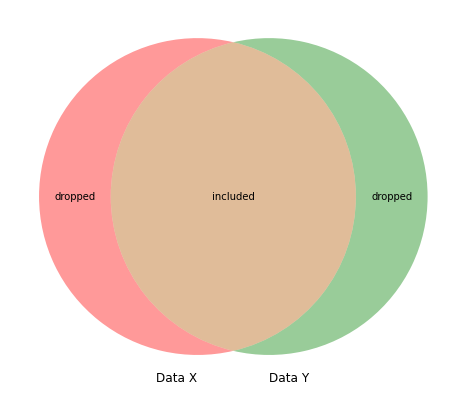

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

In [40]:
datadf = df2.df

sumstat = datadf.groupby("PriceArea").agg(
    {
        "LocalPowerMWh": ["min", "max", "median", "count"],
        "CommercialPowerMWh": ["min", "max", "median", "count"],
    }
)

sumstat.transpose()

NameError: name 'df2' is not defined

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.